In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Section 5.4
# Bayesian Model Selection

Often it is useful to compare two models to see which one fits the data best. This can be easily done using the odds ratio:

$$O_{21}\equiv \frac{p(M_{2}|D,I)}{p(M_1|D,I)}$$

The numerator and denomenator are just from Bayes' theorem:

$$p(M|D,I)\equiv\frac{p(D|M,I)p(M|I)}{p(D|I)}$$

Note that $p(D|M,I)$ is a $\it{marginal}$ $\it{likelihood}$ also called the $\it{evidence}$:

$$E(M)\equiv p(D|M,I) = \int p(D|M,\theta,I)p(\theta|M,I)d\theta$$

The good thing about the odds ratio is that because were are using the same data p(D|I) cancels which is nice because according to the book it is "The hardest term to compute"

we can write the odds ratio as:

$$O_{21} = \frac{E(M_{2})p(M_{2}|I)}{E(M_{1})p(M_{1}|I)} = B_{21} \frac{p(M_{2}|I)}{p(M_{1}|I)}$$

Where $B_{21}$ is called the Bayes factor:

$$B_{21} = \frac{E(M_2)}{E(M_1)} = \frac{p(D|M_2,I)}{p(D|M_1,I)} = \frac{\int p(D|M_2,\theta_2,I)p(\theta_2|M_2,I)d\theta_2}{\int p(D|M_1,\theta_1,I)p(\theta_1|M_1,I)d\theta_1}$$

Other than the Bayes factor there is also the quantity $p(M_{2}|I)$ / $p(M_{1}|I)$ which we can think of as a prior odds ratio, which in general seems to be a vague concept and is often just taken to be 1. Meaning prior to the calculation of the Bayes factor neither model is preferred over the other.

# Coin flipping problem

An easy example is to use a simple coin flipping problem where are two models are Model 1 where we assume the probability of getting heads is $b_*$, and model two where we assume a uniform prior on b between 0 and 1.

practically this means that $\theta$ -> b and $p(D|M,\theta,I)$ is just given by the binomial distribution

furthermore it is $p(\theta|M,I)$ that discriminates between the two models

for Model 1:
$$p(\theta_1|M_1,I) = \delta(b-b_*)$$

for Model 2:
$$p(\theta_2|M_2,I) =  \begin{cases} 
      1 & 0\leq b\leq 1 \\
      0 & otherwise \\
   \end{cases}
$$

The evidence the the case of model 1 is pretty easy to compute, and is just a constant:

$$\int p(D|M_1,\theta_1,I)p(\theta_1|M_1,I)d\theta_1 = \int_{-\infty}^{\infty} \frac{N!}{k!(N-k)!}b^{k}(1-b)^{N-k}\delta(b-b_*)db$$

where N is the total number of times the coin is flipped and k is the number of heads

because this is a constant we can fold it into the integral for Model 2 which is nice because the binomial coefficient cancels out leaving us with: 

$$O_{21} = \int_{0}^{1} \Big(\frac{b}{b_*}\Big)^{k}\Big(\frac{1-b}{1-b_*}\Big)^{N-k}db$$

In general this integral needs to be evaluated numerically, but does reduce down for specific values of $b_*$ and k/N

The following example shows how preferred one model is over another given a number of coin flips, and how many heads result from that number of coin flips. Unsurprisingly, Model 1 is preferred over Model 2 as k approaches $b_*$N.

For interpreting the odds ratio a general rule of thumb proposed by Jeffreys is that $O_{21}$ > 10 represents strong evidence that Model 2 is favored over Model 1. $O_{21}$ > 100 is "decisive", and $O_{21}$ < 3 means neither is preferred. This is from Jeffreys' $\textit{The Theory of Probability}$, I think we're just supposed to trust him because he was Knighted?  


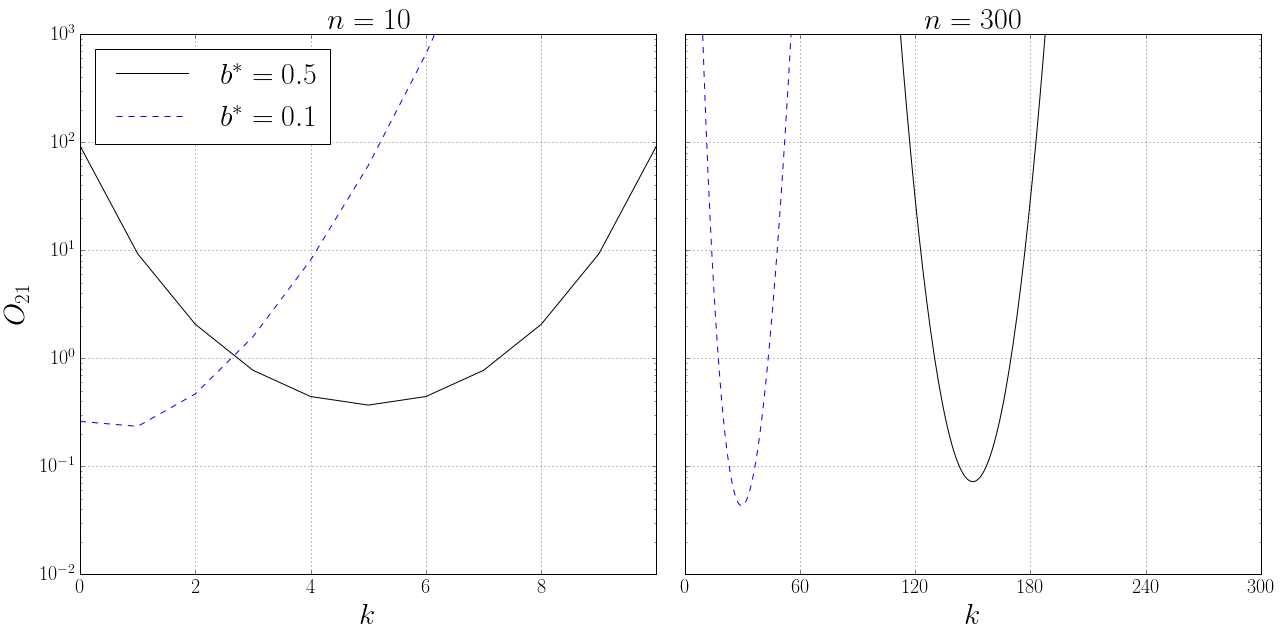

In [11]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


@np.vectorize
def odds_ratio(n, k, bstar):
    """Odds ratio between M_2, where the heads probability is unknown,
    and M_1, where the heads probability is known to be `bstar`, evaluated
    in the case of `k` heads observed in `n` tosses.

    Eqn. 5.25 in the text
    """
    factor = 1. / (bstar ** k * (1 - bstar) ** (n - k))
    f = lambda b: b ** k * (1 - b) ** (n - k)

    return factor * integrate.quad(f, 0, 1)[0]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5*4, 2.5*4))
fs = 30
fig.subplots_adjust(left=0.13, right=0.95, wspace=0.05, bottom=0.15)

subplots = [121, 122]
n_array = [10, 300]

linestyles = ['-k', '--b']
bstar_array = [0.5, 0.1]

for subplot, n in zip(subplots, n_array):
    ax = fig.add_subplot(subplot, yscale='log')
    k = np.arange(n + 1)

    # plot curves for two values of bstar
    for ls, bstar in zip(linestyles, bstar_array):
        ax.plot(k, odds_ratio(n, k, bstar), ls,
                label=r'$b^* = %.1f$' % bstar)
        
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fs/1.5)
        
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fs/1.5)

    if subplot == 121:
        ax.set_xlim(0, n - 0.01)
        ax.set_ylabel(r'$O_{21}$',fontsize=fs)
        ax.legend(loc=2,fontsize=fs)
    else:
        ax.set_xlim(0, n)
        ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xlabel('$k$',fontsize=fs)
    ax.set_title('$n = %i$' % n,fontsize=fs)
    ax.set_ylim(1E-2, 1E3)
    ax.xaxis.set_major_locator(plt.MultipleLocator(n / 5))
    ax.grid()


plt.show()

# 5.4.2 Occam's Razor

One of the neat things about Baysian statistcs is that more complicated models (those with extra free parameters) are automatically penalized. Normally this is difficult to see, but we can illustrate this with a simple example.

if we assume a Model $M(\theta)$ with a uniform prior that is flat on the range $-\Delta_\mu/2 \leq \mu \leq \Delta_\mu/2$ this implies that $p(\mu|I) = 1/\Delta_\mu$

Now if we assume the data liklihood is Gaussian centered at $\mu$ with a width $\sigma_\mu$ and furthermore assume the data distribution is much more informative than the prior ($\sigma_\mu << \Delta_\mu$)

Than the evidence can be approximated as:

$$E(M) \approx \sqrt{2\pi} L^0(M)\frac{\sigma_\mu}{\Delta_\mu}$$

Where $L^0(M)$ is the maximum of the data liklihood $p(D|M)$

The important part of this is the assumption of a uniform prior penalizes the evidence of the model by a factor of $\sigma_\mu/\Delta_\mu$

We can apply this same principle to the coin example. The liklihood of Model 2 is just a binomial distribution:

$$L(b|M_2) = C_{Nk} b^k (1-b)^{N-k}$$

where $C_{Nk}$ is the binomial coefficient. For a binomial distribution if N is large and b is not close to 0 or 1 then we can approximate it as a Gaussian where:

$$L(b|M_2) \approx C_{Nk} \sqrt{2\pi}\sigma_b (b^0)^k (1-b^0)^{N-k} \mathcal{N}(b^0,\sigma_b)$$

Where $b^0$ $=$ $k/N$ and represents the maximum of the distribution and $\sigma_b$ $=$ $\sqrt{b^0(1-b^0)/N}$

because for model 2 we assumed a uniform prior we can evaluate the evidence as we did in the pure Gaussian case, where the maximum liklihood is:

$$ L^0(M_2) = C_{Nk}(b^0)^k(1-b^0)^{N-k}$$

and now given we used a uniform prior we can approximate the evidence of model 2 assuming a uniform prior as:

$$ E(M_2) \approx \sqrt{2\pi} C_{Nk}(b^0)^k(1-b^0)^{N-k} \sigma_b$$

remember for model 1 we can just calculate the exact evidence 

$$ E(M_1) = C_{Nk}(b_*)^k(1-b_*)^{N-k} $$

Thus the odds ratio is:

$$ O_{21} \approx \sqrt{2\pi} \sigma_b \Big(\frac{b}{b_*}\Big)^{k}\Big(\frac{1-b}{1-b_*}\Big)^{N-k} $$

remember the assumption is that N is large thus $\sigma_b$ $=$ $\sqrt{b^0(1-b^0)/N}$ << 1, thus Model 2 is heavily penalized for its free parameter (the uniform prior on b)

# Section 5.5
# Nonuniform Priors: Eddington, Malmquist and Lutz-Kelker Bias

Often in astronomy we encounter problems where our prior information greatly changes our results.  A good example of something like this is a data distribution where the erros are large and the underlying distribution is very non uniform.

In astronomy such a problem arises in Eddington-Malmquist bias. The basic idea is we have some object with a known brightness and some brightness distribution, in the book they assume its an object with a known brightness, but some error distribution, but mathematically its the same.

If we have a magnitude limited sample then we see the "brighter" tail of the distribution further out, meaning our sample of objects is biased in that we have more "brighter" objects than exist in the true distribution.

This is easily seen in the next example, which is a test of Malmquist bias.  They assume a uniform distribution of objects with some errors, and then sub-sample this distribution. Note, they observe every object in this region, they don't sample randomly, you don't get a bias if you sample randomly.

If you have a function for an underlying distribution h(x) with errors e(x) the observed distribution is a convolution of the two:

$$f(x) = h(x)*e(x) = \int_{-\infty}^{\infty}h(x')e(x-x')dx'$$

in the case of Gaussian errors the distribution simply shifts and you can derive the actual shift, the derivation is easy to follow, but not simple to write down there's a decent derivation in the specific case of stars in Binney and Merrifield (Chapter 3) but as a general case:

$$\Delta x = -\sigma^2 \frac{1}{f(x)}\frac{df(x)}{dx} $$

specifically for Malmquist bias for a spatially uniform population of sources with the same $\it{absoulte}$ $\it{magnitude}$ the distribution of $\it{apparent}$ $\it{magnitudes}$ is:

$$ h(x) = h_o 10^{kx} \implies \Delta x = -\sigma^2 k \ ln(10)$$

/Library/Python/2.7/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


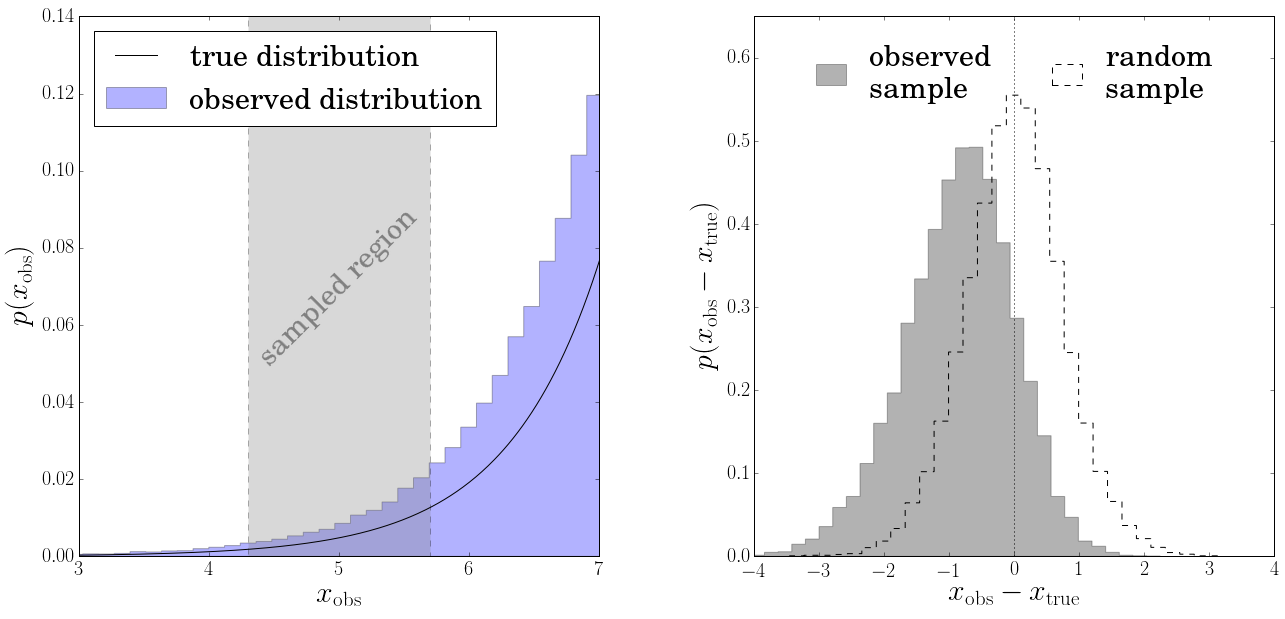

In [15]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.stats.random import trunc_exp

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Sample from a truncated exponential distribution
fs = 30
N = 1E6
hmin = 4.3
hmax = 5.7
k = 0.6 * np.log(10)
true_dist = trunc_exp(hmin - 1.4,
                      hmax + 3.4,
                      0.6 * np.log(10))

# draw the true distributions and heteroscedastic noise
np.random.seed(0)
h_true = true_dist.rvs(N)
dh = 0.5 * (1 + np.random.random(N))
h_obs = np.random.normal(h_true, dh)

# create observational cuts
cut = (h_obs < hmax) & (h_obs > hmin)

# select a random (not observationally cut) subsample
rand = np.arange(len(h_obs))
np.random.shuffle(rand)
rand = rand[:cut.sum()]

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5*4, 2.5*4))
fig.subplots_adjust(left=0.12, right=0.95, wspace=0.3,
                    bottom=0.15, top=0.9)

# First axes: plot the true and observed distribution
ax = fig.add_subplot(121)
bins = np.linspace(0, 12, 100)

x_pdf = np.linspace(0, 12, 1000)
ax.plot(x_pdf, true_dist.pdf(x_pdf), '-k',
        label='true distribution')
ax.hist(h_obs, bins, histtype='stepfilled',
        alpha=0.3, fc='b', normed=True,
        label='observed distribution')
ax.legend(loc=2, handlelength=2,fontsize=fs)

ax.add_patch(plt.Rectangle((hmin, 0), hmax - hmin, 1.2,
                           fc='gray', ec='k', linestyle='dashed',
                           alpha=0.3))
ax.text(5, 0.07, 'sampled region', rotation=45, ha='center', va='center',
        color='gray',fontsize=fs)

for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fs/1.5)
        
for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fs/1.5)

ax.set_xlim(hmin - 1.3, hmax + 1.3)
ax.set_ylim(0, 0.14001)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_xlabel(r'$x_{\rm obs}$',fontsize=fs)
ax.set_ylabel(r'$p(x_{\rm obs})$',fontsize=fs)

# Second axes: plot the histogram of (x_obs - x_true)
ax = fig.add_subplot(122)
bins = 30
ax.hist(h_obs[cut] - h_true[cut], bins, histtype='stepfilled',
        alpha=0.3, color='k', normed=True, label='observed\nsample')
ax.hist(h_obs[rand] - h_true[rand], bins, histtype='step',
        color='k', linestyle='dashed', normed=True, label='random\nsample')
ax.plot([0, 0], [0, 1], ':k')
ax.legend(ncol=2, loc='upper center', frameon=False, handlelength=1,fontsize=fs)

for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fs/1.5)
        
for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fs/1.5)

ax.set_xlim(-4, 4)
ax.set_ylim(0, 0.65)
ax.set_xlabel(r'$x_{\rm obs} - x_{\rm true}$',fontsize=fs)
ax.set_ylabel(r'$p(x_{\rm obs} - x_{\rm true})$',fontsize=fs)
plt.show()

# Figure 5.3

As an excersize they make a estimate of Malmquist bias in LSST. The idea is with modern astronomical surveys the errors are going to be far from homoscedastic, which is what is assumed in the classical definition of Malmquist bias

In figure 5.3 they assume heteroscedastic errors which follow a formula:

$$\sigma^2 = (0.04-\gamma)x+\gamma x^2$$ 
where $x=10^{0.4(m-m_5)}$ and $\gamma = 0.039$, $m_5$ represents the "5$\sigma$ limiting magnitude" of an optical sky noise-limited photometric survey. For the figure below $m_5$ = 24, they state that in order to minimize the effects of Malmquist bias we should choose sources 1 mag higer than $m_5$ at least.

/Library/Python/2.7/site-packages/ipykernel/__main__.py:29: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


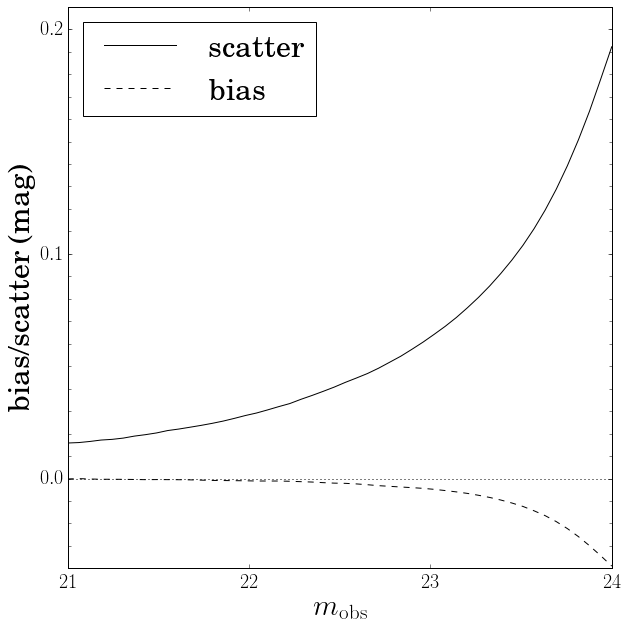

In [21]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.stats import median_sigmaG

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


def generate_magnitudes(N, k=0.6, m_min=20, m_max=25):
    """
    generate magnitudes from a distribution with
      p(m) ~ 10^(k m)
    """
    klog10 = k * np.log(10)
    Pmin = np.exp(klog10 * m_min)
    Pmax = np.exp(klog10 * m_max)
    return (1. / klog10) * np.log(Pmin + (Pmax - Pmin) * np.random.random(N))


def mag_errors(m_true, m5=24.0, fGamma=0.039):
    """
    compute magnitude errors based on the true magnitude and the
    5-sigma limiting magnitude, m5
    """
    x = 10 ** (0.4 * (mtrue - m5))
    return np.sqrt((0.04 - fGamma) * x + fGamma * x ** 2)

#----------------------------------------------------------------------
# Compute the Eddington-Malmquist bias & scatter

mtrue = generate_magnitudes(1E6, m_min=20, m_max=25)
photomErr = mag_errors(mtrue)

m1 = mtrue + np.random.normal(0, photomErr)
m2 = mtrue + np.random.normal(0, photomErr)
dm = m1 - m2

mGrid = np.linspace(21, 24, 50)
medGrid = np.zeros(mGrid.size)
sigGrid = np.zeros(mGrid.size)

for i in range(mGrid.size):
    medGrid[i], sigGrid[i] = median_sigmaG(dm[m1 < mGrid[i]])

#----------------------------------------------------------------------
# Lutz-Kelker bias and scatter

mtrue = generate_magnitudes(1E6, m_min=17, m_max=20)
relErr = 0.3 * 10 ** (0.4 * (mtrue - 20))

pErrGrid = np.arange(0.02, 0.31, 0.01)

deltaM2 = 5 * np.log(1 + 2 * relErr ** 2)
deltaM4 = 5 * np.log(1 + 4 * relErr ** 2)

med2 = [np.median(deltaM2[relErr < e]) for e in pErrGrid]
med4 = [np.median(deltaM4[relErr < e]) for e in pErrGrid]

#----------------------------------------------------------------------
# plot results
fig = plt.figure(figsize=(5*4, 2.5*4))
fig.subplots_adjust(left=0.1, right=0.95, wspace=0.25,
                    bottom=0.17, top=0.95)

ax = fig.add_subplot(121)
ax.plot(mGrid, sigGrid, '-k', label='scatter')
ax.plot(mGrid, medGrid, '--k', label='bias')
ax.plot(mGrid, 0 * mGrid, ':k', lw=1)
ax.legend(loc=2,fontsize=fs)

ax.set_xlabel(r'$m_{\rm obs}$',fontsize=fs)
ax.set_ylabel('bias/scatter (mag)',fontsize=fs)

ax.set_ylim(-0.04, 0.21)
#ax.set_xlim(20,25)
ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.01))

for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fs/1.5)
        
for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fs/1.5)

for l in ax.yaxis.get_minorticklines():
    l.set_markersize(3)
'''
ax = fig.add_subplot(122)
ax.plot(pErrGrid, med2, '-k', label='$p=2$')
ax.plot(pErrGrid, med4, '--k', label='$p=4$')
ax.legend(loc=2,fontsize=fs)
ax.set_xlabel(r'$\sigma_\pi / \pi$',fontsize=fs)
ax.set_ylabel('absolute magnitude bias',fontsize=fs)
ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))

for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fs/1.5)
        
for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fs/1.5)

ax.set_xlim(0.02, 0.301)
ax.set_ylim(0, 0.701)
'''
plt.show()